<a href="https://colab.research.google.com/github/raodnik/ML/blob/main/KNN_theory_applied_on_Unknown_context_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [91]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


In [92]:
from google.colab import drive

In [93]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [114]:
df = pd.read_csv('/content/drive/MyDrive/Datasets/Classified_Data.csv')

In [115]:
df.head()

,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ,TARGET CLASS
0,0.913917,1.162073,0.567946,0.755464,0.780862,0.352608,0.759697,0.643798,0.879422,1.231409,1
1,0.635632,1.003722,0.535342,0.825645,0.924109,0.648450,0.675334,1.013546,0.621552,1.492702,0
2,0.721360,1.201493,0.921990,0.855595,1.526629,0.720781,1.626351,1.154483,0.957877,1.285597,0
3,1.234204,1.386726,0.653046,0.825624,1.142504,0.875128,1.409708,1.380003,1.522692,1.153093,1
4,1.279491,0.949750,0.627280,0.668976,1.232537,0.703727,1.115596,0.646691,1.463812,1.419167,1


In [116]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   WTT           1000 non-null   float64
 1   PTI           1000 non-null   float64
 2   EQW           1000 non-null   float64
 3   SBI           1000 non-null   float64
 4   LQE           1000 non-null   float64
 5   QWG           1000 non-null   float64
 6   FDJ           1000 non-null   float64
 7   PJF           1000 non-null   float64
 8   HQE           1000 non-null   float64
 9   NXJ           1000 non-null   float64
 10  TARGET CLASS  1000 non-null   int64  
dtypes: float64(10), int64(1)
memory usage: 86.1 KB


In [128]:
#The scale of the variable matters a lot. Scikit StandardScaler standardizes everything to same scale
from sklearn.preprocessing import StandardScaler

In [118]:
scaler = StandardScaler()

In [119]:
scaler.fit(df.drop('TARGET CLASS',axis=1))

StandardScaler()

In [120]:
scaled_features = scaler.transform(df.drop('TARGET CLASS',axis=1))

In [130]:
df_feat = pd.DataFrame(scaled_features,columns=df.columns[:-1])
df_feat.head()

,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ
0,-0.123542,0.185907,-0.913431,0.319629,-1.033637,-2.308375,-0.798951,-1.482368,-0.949719,-0.643314
1,-1.084836,-0.430348,-1.025313,0.625388,-0.444847,-1.152706,-1.129797,-0.202240,-1.828051,0.636759
2,-0.788702,0.339318,0.301511,0.755873,2.031693,-0.870156,2.599818,0.285707,-0.682494,-0.377850
3,0.982841,1.060193,-0.621399,0.625299,0.452820,-0.267220,1.750208,1.066491,1.241325,-1.026987
4,1.139275,-0.640392,-0.709819,-0.057175,0.822886,-0.936773,0.596782,-1.472352,1.040772,0.276510


In [131]:
#Train Test Split

In [122]:
from sklearn.model_selection import train_test_split

In [123]:
X_train, X_test, y_train, y_test = train_test_split(scaled_features,df['TARGET CLASS'], test_size=0.30)

In [124]:
from sklearn.neighbors import KNeighborsClassifier

In [125]:
knn = KNeighborsClassifier(n_neighbors=1)

In [126]:
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=1)

In [127]:
pred = knn.predict(X_test)

In [132]:
from sklearn.metrics import classification_report, confusion_matrix

In [133]:
print(classification_report(y_test, pred))


              precision    recall  f1-score   support

           0       0.89      0.87      0.88       143
           1       0.88      0.90      0.89       157

    accuracy                           0.89       300
   macro avg       0.89      0.89      0.89       300
weighted avg       0.89      0.89      0.89       300



In [134]:
print(confusion_matrix(y_test, pred))

[[124  19]
 [ 15 142]]


In [135]:
#Elbow method- to choose better K value that gives better metrics

In [137]:
error_rate=[]
for i in range(1,40):

   knn=KNeighborsClassifier(n_neighbors=i)
   knn.fit(X_train, y_train)
   i_pred = knn.predict(X_test)
   error_rate.append(np.mean(i_pred != y_test))

Text(0, 0.5, 'Error_rate')

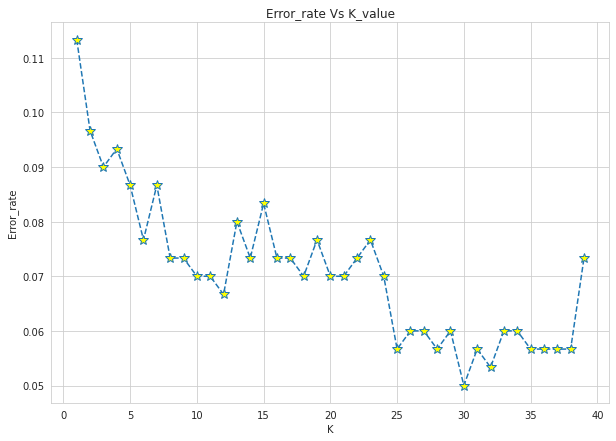

In [144]:
sns.set_style('whitegrid')
plt.figure(figsize=(10,7))
plt.plot(range(1,40), error_rate, linestyle='--', marker = '*', markerfacecolor='yellow',markersize = 10)

plt.title('Error_rate Vs K_value')
plt.xlabel('K')
plt.ylabel('Error_rate')

In [146]:
knn_e = KNeighborsClassifier(n_neighbors=30)

knn_e.fit(X_train, y_train)
knn_e_pred = knn_e.predict(X_test)

print(classification_report(y_test, knn_e_pred))


              precision    recall  f1-score   support

           0       0.96      0.94      0.95       143
           1       0.94      0.96      0.95       157

    accuracy                           0.95       300
   macro avg       0.95      0.95      0.95       300
weighted avg       0.95      0.95      0.95       300



In [147]:
print(confusion_matrix(y_test, knn_e_pred))

[[134   9]
 [  6 151]]


In [ ]:
#By choosing better K value that is obtained by elbow method, the metrics have improved significantly.